# Ayudantía 2 - Velocidad de reacción | Orden, equilibrio y efecto de temperatura
Dpto. de Ingeniería Química y Bioprocesos

Diseño de Reactores - IIQ2113

Ayudante: Felipe Guzmán Arce - felipe.guzman@uc.cl

Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Pregunta 4

En el proceso de fabricación de fertilizante se utiliza dióxido de nitrógeno ($NO_2$) como fuente de nitrógeno. Para esto, se realiza una reacción de descomposición del compuesto:

$2NO_2 \rightarrow N_2 + 2O_2$

Experimentos a diferentes temperaturas ha permitido determinar los valores de las constantes cinéticas en cada condición. Su jefe le está pidiendo que utilice esta información y le diga cual sería la velocidad de reacción estimada si es que el reactor opera a 700 K, teniendo presente la energía de activación de la reacción.

Constantes cinéticas en función de la temperatura

| T (K) | k (M⁻¹·s⁻¹) |
|-------|-------------|
| 592   | 522         |
| 603   | 755         |
| 627   | 1790        |
| 652   | 4020        |
| 656   | 5030        |


In [11]:
# Datos Experimentales
T = np.array([592, 603, 627, 652, 656])  # Temperaturas en Kelvin
k = np.array([522, 755, 1790, 4020, 5030])  # Constantes cinéticas

# Constante de los gases ideales
R = 8.314  # Constante R J/(mol*K)

# Reajuste de datos experimentales
T_inv = 1/T  # Inverso de las temperaturas
ln_k = np.log(k)  # Logaritmo natural de las constantes cinéticas

print("Inverso de las temperaturas:", T_inv)
print("Ln de k:", ln_k)




Inverso de las temperaturas: [0.00168919 0.00165837 0.0015949  0.00153374 0.00152439]
Ln de k: [6.25766759 6.62671775 7.4899709  8.29903718 8.52317526]


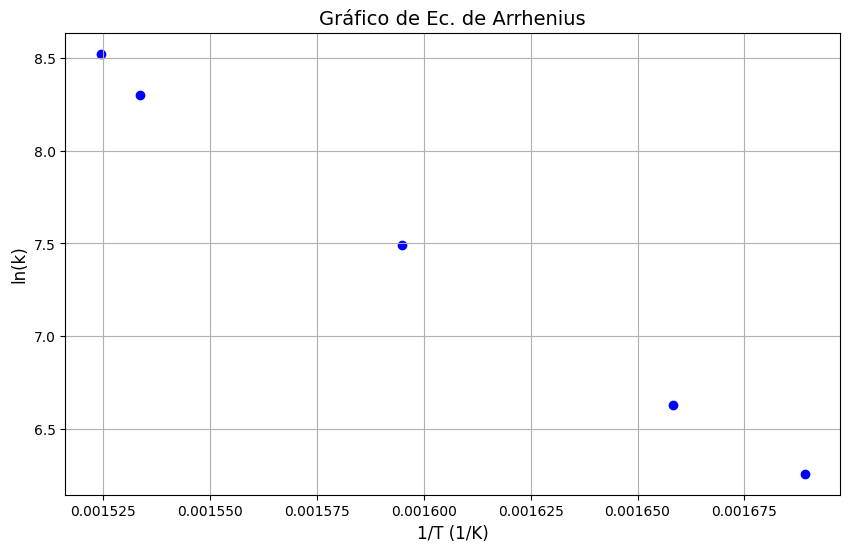

In [12]:
# Gráfico de los datos experimentales
plt.figure(figsize=(10, 6))
plt.scatter(T_inv, ln_k, color='blue', label='Datos experimentales')

plt.xlabel('1/T (1/K)', fontsize=12)
plt.ylabel('ln(k)', fontsize=12)
plt.title('Gráfico de Ec. de Arrhenius', fontsize=14)

#plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Ajuste a datos experimentales
curve = np.polyfit(T_inv, ln_k, 1)  # Ajuste lineal
m, b = curve  # pendiente y corte en "y"

# Parámetros de Arrhenius
Ea = -m * R # kJ/mol
A = np.exp(b)

print(f"Ea = {Ea:.2f} kJ/mol")
print(f"A = {A:.3e} M^-1 s^-1")


Ea = 112939.87 kJ/mol
A = 4.687e+12 M^-1 s^-1


In [18]:
# Curva ajustada (en k vs T)
T_fit = np.linspace(min(T)-2, max(T)+10, 200)
k_fit = A * np.exp(-Ea / (R * T_fit))

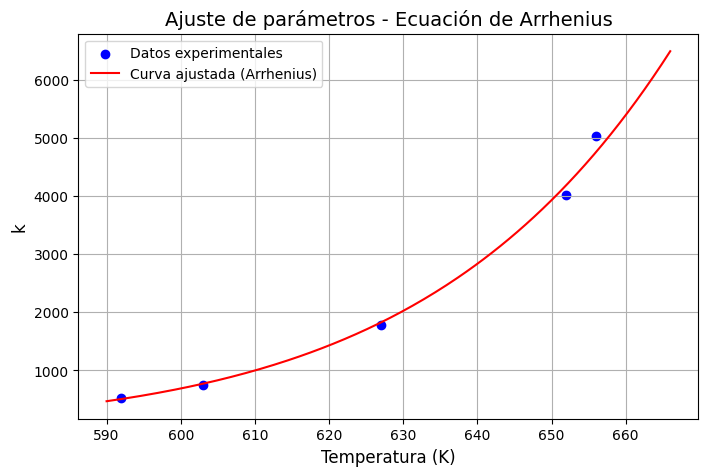

In [19]:
# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(T, k, color='blue', label='Datos experimentales')
plt.plot(T_fit, k_fit, color='red', label='Curva ajustada (Arrhenius)')
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel('k', fontsize=12)
plt.title('Ajuste de parámetros - Ecuación de Arrhenius', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Velocidad de reacción a 700 K
T_700 = 700  # Temperatura en K
k_700 = A * np.exp(-Ea / (R * T_700))
print(f"Velocidad de reacción a 700 K: {k_700:.2f} M^-1 s^-1")

Velocidad de reacción a 700 K: 17494.85 M^-1 s^-1
